In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train #2d array we need to conv it to 1d array using reshape 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]
#1d array

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

    

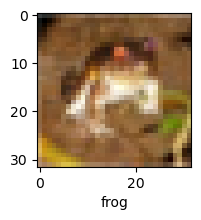

In [15]:

plot(X_train, y_train, 0)

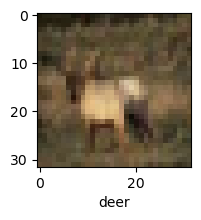

In [16]:

plot(X_train, y_train, 3)

In [17]:
#Normalize the images to a number from 0 to 1. 
#Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 
#Hence to normalize in 0-->1 range, we need to divide it by 255

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
X_train[0] #normalized

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 93ms/step - accuracy: 0.3091 - loss: 1.9255
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.4218 - loss: 1.6411
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 85ms/step - accuracy: 0.4510 - loss: 1.5538
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.4722 - loss: 1.4939
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4920 - loss: 1.4411


In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step


In [27]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.56      0.52      1000
           1       0.57      0.65      0.61      1000
           2       0.41      0.28      0.33      1000
           3       0.40      0.25      0.31      1000
           4       0.46      0.36      0.40      1000
           5       0.41      0.39      0.40      1000
           6       0.39      0.75      0.51      1000
           7       0.69      0.41      0.51      1000
           8       0.47      0.77      0.58      1000
           9       0.68      0.35      0.46      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [ ]:
#use of cnn

In [ ]:
#has layers convolitional+relu, pooling,convolitional+relu,pooling,flatten
convoluntion detects the features 

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

C:\Users\Tarannum\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 0.3885 - loss: 1.6843
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5996 - loss: 1.1408
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6568 - loss: 0.9876
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6955 - loss: 0.8863
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 57ms/step - accuracy: 0.7209 - loss: 0.8071
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.7445 - loss: 0.7461
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7584 - loss: 0.6948
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 47ms/step - accuracy: 0.7759 - loss: 0.6476
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.7894 - loss: 0.6046
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 54ms/step - accuracy: 0.8018 - loss: 0.5668


In [ ]:
#now we predict
#With CNN, at the end 5 epochs, 
#accuracy was at around 70% which is a significant improvement over ANN. 
#CNN's are best for image classification and gives superb accuracy. 
#Also computation is much less compared to simple ANN as maxpooling reduces 
#the image dimensions while still preserving the features


In [32]:

cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7134 - loss: 0.8840


[0.8971714973449707, 0.7081000208854675]

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5]
#now we need tp find max value we use argmax func
#it give the index of max num

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[4.2873500e-05, 3.7842514e-05, 3.6945224e-03, 9.7871304e-01,
        1.1440175e-04, 8.2878163e-03, 9.9734799e-04, 3.4283473e-06,
        8.0844183e-03, 2.4381963e-05],
       [7.7900067e-03, 6.2590197e-02, 8.0569567e-05, 1.2637605e-06,
        2.0916740e-08, 1.2615632e-07, 1.2895606e-07, 1.3868784e-07,
        9.2887437e-01, 6.6320575e-04],
       [1.1377544e-01, 3.5294479e-01, 9.0431783e-04, 1.6785767e-03,
        2.0112304e-04, 6.9927273e-04, 7.4959994e-06, 6.1261547e-03,
        4.9007770e-01, 3.3585083e-02],
       [9.3847054e-01, 1.0339551e-02, 3.0152488e-02, 9.1740600e-04,
        7.9459778e-04, 9.0297226e-06, 5.6171749e-04, 1.2687792e-03,
        1.7433075e-02, 5.2757005e-05],
       [1.8973681e-08, 3.1102449e-05, 2.6148787e-02, 1.9542398e-02,
        2.2401647e-01, 1.0246140e-04, 7.3011804e-01, 6.6525752e-07,
        3.9820377e-05, 1.8374331e-07]], dtype=float32)

In [34]:
np.argmax([12,4,6,18])

3

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
# Example: predictions for 3 samples, each with 4 classes
#y_pred = np.array([[0.1, 0.5, 0.3, 0.1],
                  # [0.2, 0.3, 0.4, 0.1],
                   #[0.7, 0.2, 0.1, 0.0]])

# Find the index of the maximum value for each sample
#indices = [np.argmax(element) for element in y_pred]
#print(indices)  # Output: [1, 2, 0]

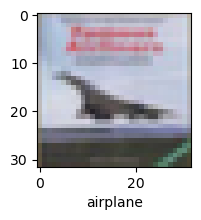

In [37]:
plot(X_test, y_test,3)

In [38]:
classes[y_classes[3]]

'airplane'

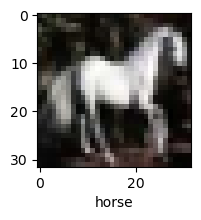

In [39]:
plot(X_test, y_test,13)

In [40]:
classes[y_classes[13]]

'horse'

In [41]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      1000
           1       0.85      0.81      0.83      1000
           2       0.57      0.65      0.61      1000
           3       0.50      0.59      0.54      1000
           4       0.68      0.61      0.65      1000
           5       0.60      0.59      0.60      1000
           6       0.85      0.73      0.78      1000
           7       0.74      0.77      0.75      1000
           8       0.83      0.81      0.82      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

